##Transfer Learning Using VGG16 AND VGG19 Using Keras

In [1]:
import tensorflow as tf

In [8]:
# Importing the bibraries

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ataher/cotton-leaf-disease-dataset")
#path = path +'

print("Path to dataset files:", path)
print("Files:", os.listdir(path))

Path to dataset files: /root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1
Files: ['train', 'test']


In [12]:
# resize all teh images to this

IMAGE_SIZE = [224,224]

train_path = '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train'
test_path = '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test'

In [16]:
#import the VGG16 library as shown below adn add preprocessing layer to hte front of InceptionV#
#Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE +[3],weights = 'imagenet', include_top=False)

# dont't train existing weights
for layer in vgg16.layers:
  layer.trainable = False

In [17]:
#useful for getting number of output classes

folders = glob('/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/*')

folders

['/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Healthy',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Army worm',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Powdery Mildew',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Aphids',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Target spot',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train/Bacterial Blight']

In [18]:
#useful for getting number of output classes

test_folders = glob('/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/*')

test_folders

['/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Healthy leaf',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Army worm',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Powdery Mildew',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Aphids',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Target spot',
 '/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test/Bacterial Blight']

In [20]:
# Our layer - You can add more if you want

x = Flatten()(vgg16.output)

In [21]:
prediction = Dense(len(folders),activation='softmax')(x)

#create a model object

model = Model(inputs=vgg16.input,outputs= prediction)

In [23]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │         150,534 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,865,222 (56.71 MB)

 Trainable params: 150,534 (588.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
# tell the model what cost and optimization method to use

model.compile(
    loss = 'categorical_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy'])

In [26]:
# Use the Image Data Generator to improt the images from teh dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
#Make sure you provie the same target size as initalized for the image size

traning_set = train_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                class_mode = 'categorical')
#Make sure you provie the same target size as initalized for the image size

testing_set = test_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/ataher/cotton-leaf-disease-dataset/versions/1/test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                class_mode = 'categorical')

Found 2400 images belonging to 6 classes.
Found 237 images belonging to 6 classes.


In [29]:
r = model.fit(
    traning_set,
    validation_data = testing_set,
    epochs = 15,
    steps_per_epoch = len(traning_set),
    validation_steps = len(testing_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 741ms/step - accuracy: 0.5892 - loss: 1.1921 - val_accuracy: 0.9409 - val_loss: 0.1858
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 563ms/step - accuracy: 0.9122 - loss: 0.2717 - val_accuracy: 0.9916 - val_loss: 0.0494
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 578ms/step - accuracy: 0.9468 - loss: 0.1876 - val_accuracy: 0.9916 - val_loss: 0.0367
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 561ms/step - accuracy: 0.9627 - loss: 0.1281 - val_accuracy: 0.9958 - val_loss: 0.0290
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.9713 - loss: 0.1127 - val_accuracy: 0.9958 - val_loss: 0.0275
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 570ms/step - accuracy: 0.9803 - loss: 0.0772 - val_accuracy: 0.9916 - val_loss: 0.0295
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 546ms/step - accuracy: 0.9843 - loss: 0.0625 - val_accuracy: 0.9916 - val_loss: 0.0348
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 551ms/step - accuracy: 0.9867 - loss: 0.0564 - val_accu

In [30]:
import matplotlib.pyplot as plt


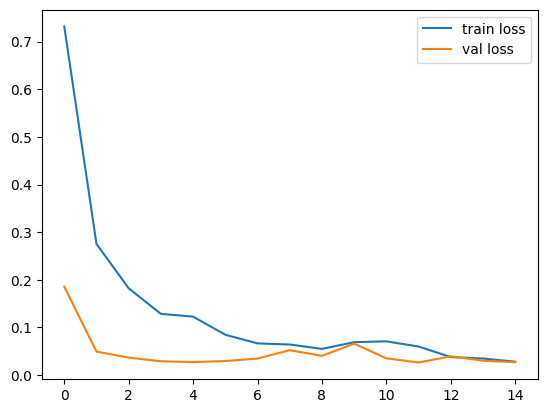

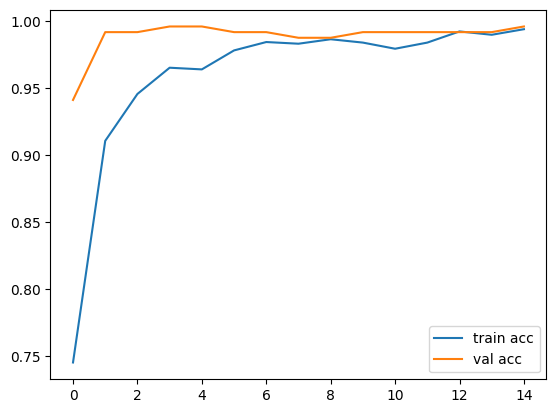

In [32]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


#plot the acuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [33]:
# Save it as a .keras file
model.save('model_vgg16.keras')